In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.DataFrame([[2, 20], [4,40], [8,80], [9,90]], columns = ['시간','성적'])

In [4]:
data

,시간,성적
0,2,20
1,4,40
2,8,80
3,9,90


### 수학 공식을 이용한 해석적 모델
- LinearRegression

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
l_model = LinearRegression()
l_model.fit(data[['시간']], data['성적'])

LinearRegression()

In [7]:
# 가중치(W)
print(l_model.coef_)

# 절편(b)
print(l_model.intercept_)

[10.]
7.105427357601002e-15


In [8]:
l_model.predict([[6]])

array([60.])

### 평균제곱오차(MSE) 구현

 H(x) : w*x + b

In [9]:
def h(w, x, b):
    return w * x + b

In [15]:
def cost(data, target, weight, intercept):
    y_pre = h(weight, data, intercept) #예측값
    return ((y_pre - target)**2).mean() #평균제곱오차(MSE)

In [16]:
cost(data['시간'], data['성적'], 10, 0)

0.0

In [17]:
cost(data['시간'], data['성적'], 12, 5)

305.0

### 경사하강법

In [18]:
weight_arr = range(-10,31)

In [21]:
cost_list = []
for i in weight_arr:
    c = cost(data['시간'], data['성적'], i, 5)
    cost_list.append(c)

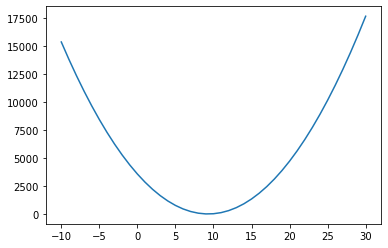

In [23]:
plt.plot(weight_arr, cost_list)
plt.show()

In [24]:
from sklearn.linear_model import SGDRegressor

In [26]:
s_model = SGDRegressor(max_iter = 5000, #가중치 업데이트 반복 횟수
                       eta0 = 0.05, #학습률(Learning rate)
                       verbose = 1) #학습과정 확인(1), (0) : 확인안함

In [27]:
s_model.fit(data[['시간']], data['성적'])

-- Epoch 1
Norm: 1.99, NNZs: 1, Bias: 2.157443, T: 4, Avg. loss: 5326.722162
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.48, NNZs: 1, Bias: 4.054343, T: 8, Avg. loss: 696.108208
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.49, NNZs: 1, Bias: 4.792849, T: 12, Avg. loss: 1072.808941
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 7.87, NNZs: 1, Bias: 5.373200, T: 16, Avg. loss: 87.664188
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 8.50, NNZs: 1, Bias: 5.400459, T: 20, Avg. loss: 48.070893
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.11, NNZs: 1, Bias: 5.456263, T: 24, Avg. loss: 7.607476
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 8.97, NNZs: 1, Bias: 5.344156, T: 28, Avg. loss: 5.852055
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.31, NNZs: 1, Bias: 5.330556, T: 32, Avg. loss: 4.137173
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.07, NNZs: 1, Bias: 5.209421, T: 36, Avg. loss: 3.913575
Total training time: 0.00 seconds.
--

SGDRegressor(eta0=0.05, max_iter=5000, verbose=1)

In [38]:
s_model.predict([[5]])

array([50.16350602])

In [39]:
print(s_model.coef_)
print(s_model.intercept_)

[9.92293424]
[0.5488348]
